In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from models.regression.MLPRegressionCustom import MLP
from models.metrics.regression import RMSE, MSE, MAE
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = np.genfromtxt('./concrete.csv', delimiter=',')
X = df[:, :-1]
y = df[:, -1].reshape(-1, 1)

X = MinMaxScaler().fit_transform(X)
y = MinMaxScaler().fit_transform(y)

### Train Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
_X_train, X_val, _y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [4]:
neuronios = [3, 5, 10, 15]
learning_rate = [0.1, 0.15, 0.25, 0.4]
momentum = [0.3, 0.4, 0.9]

result = []

elected = None

for n in neuronios:
    for l in learning_rate:
        for m in momentum:
            net = MLP(_X_train, _y_train, n, eta=l, niterations=200, momentum=m, outtype="linear")
            net.fit(_X_train, _y_train, X_val, y_val)
            result.append([net, np.min(net.errors_valid)])
            print("Neuronios: {} Learning Rate: {}, Momentum: {}. Score: {}".format(n, l, m, np.min(net.errors_valid)))

elected = result[np.argmin(np.array(result)[:, 1])][0]

Iteration:  0  Error:  317.04213331841544
Iteration:  100  Error:  12.650882438618137
Neuronios: 3 Learning Rate: 0.1, Momentum: 0.3. Score: 4.01774379653854
Iteration:  0  Error:  13.72225461384686
Iteration:  100  Error:  12.77581046082076
Neuronios: 3 Learning Rate: 0.1, Momentum: 0.4. Score: 4.1342971066098535
Iteration:  0  Error:  35.89833528950237
Iteration:  100  Error:  10.354620505228514
Neuronios: 3 Learning Rate: 0.1, Momentum: 0.9. Score: 2.537402764702824
Iteration:  0  Error:  41.51831283557495
Iteration:  100  Error:  15.667471073409963
Neuronios: 3 Learning Rate: 0.15, Momentum: 0.3. Score: 4.954960537545304
Iteration:  0  Error:  631.2433665314811
Iteration:  100  Error:  12.949946775089064
Neuronios: 3 Learning Rate: 0.15, Momentum: 0.4. Score: 4.22136048457328
Iteration:  0  Error:  24.34175517754148
Iteration:  100  Error:  9.56738674700383
Neuronios: 3 Learning Rate: 0.15, Momentum: 0.9. Score: 2.062868633776195
Iteration:  0  Error:  29.650479918292543
Iteration:

Iteration:  0  Error:  0.4405718455720409
Iteration:  100  Error:  0.15491819424426925
Iteration:  200  Error:  0.1269192343466937


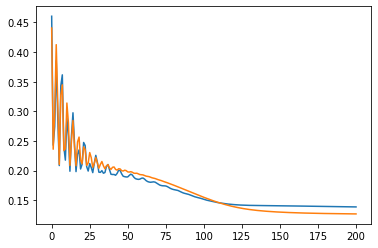

Iteration:  0  Error:  1.695261060113862
Iteration:  100  Error:  0.04379071887849314
Iteration:  200  Error:  0.04340638485005536


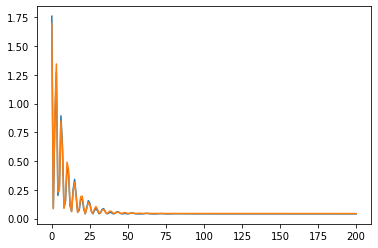

Iteration:  0  Error:  0.2989406985198796
Iteration:  100  Error:  0.11750568972076092
Iteration:  200  Error:  0.10216868796295289


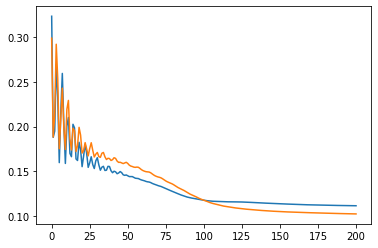

In [5]:
metrics = [
    ("RMSE", RMSE()),
    ("MSE", MSE()),
    ("MSE", MAE())
]

for name, metric in metrics:
    net = MLP(_X_train, _y_train, elected.nhidden, eta=elected.eta, niterations=201, momentum=elected.momentum,outtype="linear", metric=metric)
    net.fit(_X_train, _y_train, X_test, y_test)
    plt.plot(net.errors_valid)
    plt.plot(net.errors_train)
    plt.show()